<a href="https://colab.research.google.com/github/vddavydova/colab/blob/main/sem03_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAP: class_3_func

______

## План на сегодня:

* функции
* сортировка данных
* рекурсия

______

# Функция

####  – блок организованного, многократно используемого кода, который используется для выполнения конкретного задания. 

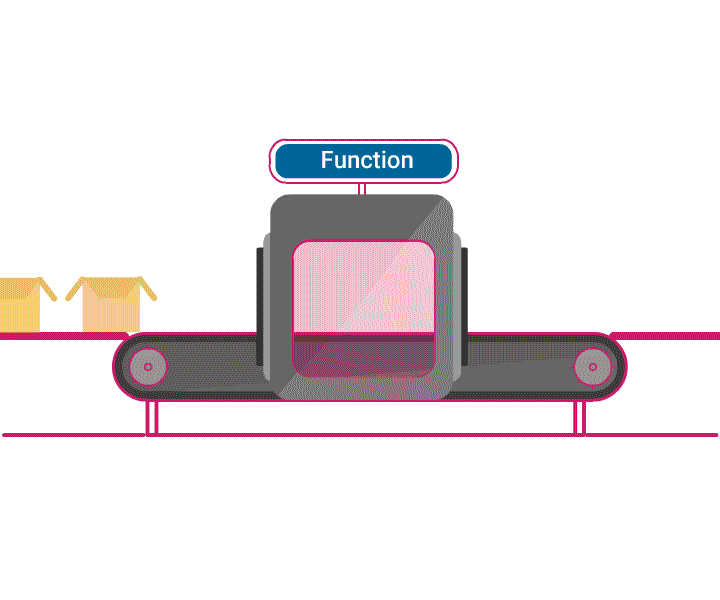


Мы уже изучили множество встроенных функций – `print()`, `input()`, `tuple()`, `list()`, `range()`. Как мы знаем, функция (в том числе метод) возможно принимает на вход какие-то аргументы, по заданным инструкциям выполняет какой-то код при её вызове и возможно возвращает какие-то объекты.

_**Сегодня мы научимся сами создавать свои функции!**_

# Другие важные функции
Но перед этим, изучим несколько важных встроенных функций.

#### Нумерация последовательности `enumerate`.

Функция для удобного использования индексов элементов в цикле – `enumerate()`. [Жамкнуть сюда, чтобы посмотреть справку по ф-ции](https://docs.python.org/3/library/functions.html#enumerate). 


Синтаксис выглядит следующим образом:

```

enumerate(sequence, [start=0])
    := (start, x_0), (start + 1, x_1), ... (start + len(sequence) - 1, x_last) 
    
```

В качестве параметра `sequence` может стоять любой итерируемый объект – последовательность – список, кортеж, строка, range. На выходе функция выдает последовательность типа `enumerate`, элементы которой есть кортежи `(счетчик, элемент)`. Например:

In [ ]:
a = 'ABCDE'
print(type(enumerate(a)))
print(enumerate(a))

# чтобы быстро вывести элементы, мы преобразуем тип enumerate в список
print(list(enumerate(a)))
print(list(enumerate(a, 1)))

<class 'enumerate'>
[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E')]
[(1, 'A'), (2, 'B'), (3, 'C'), (4, 'D'), (5, 'E')]


**! Обратите внимание**, что элементами объекта `enumerate` являются кортежи-пары. Использование в цикле:

In [ ]:
a = ['A', 'B', 'C', 'D', 'E', 'F']
for (i, letter) in enumerate(a, 1): # (1, A), (2, B), (3, C), (4, D), (5, F)
    # множественное присваивание позволяет сразу класть элементы тьюпла в несколько переменных
    # i, letter = 1, A     и т.д.
    if i % 2:
        print(letter, '- нечетная буква')
    else: 
        print(letter, '- четная буква')

A - нечетная буква
B - четная буква
C - нечетная буква
D - четная буква
E - нечетная буква
F - четная буква


#### Множественное присваивание в цикле

Вы наверное удивились тому, как написан заголовок цикла: "А что так можно было?". Да! Помните мы меняли местами значения двух переменных: a, b = b, a. Здесь примерно такая же логика. Так как элементом объекта `enumerate` является кортеж-пара: `(nomer, element)`, то в момент начала итерации цикла происходит следующее:

`a, b = nomer, element`

Можно было бы записать и `a = (nomer, element)`, тогда `a` – кортеж, и далее использовать `a[0]` и `a[1]` внутри итерации, но это не такая красивая и краткая запись, как в примере выше.

In [ ]:
for a, b in ((1, 2), (3, 4), (5, 6)):
    print(a + b)

3
7
11


Главное правило – число переменных должно совпадать с числом выдаваемых значений, иначе получите ошибку:

In [ ]:
for a, b, c in [(1, 2), (2, 3)]:
    pass

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
for a, b in [(1, 2, 3), (4, 5, 6)]:
    pass

ValueError: too many values to unpack (expected 2)

#### Агрегирование последовательностей `zip`

Функция `zip` [почитать документацию про ф-цию](https://docs.python.org/3/library/functions.html#zip) буквально собирает несколько последовательностей в одну. Её применение выглядит следующим образом:

````
zip(seq_1, seq_2, ...., seq_n)
    := (x_1_0, x_2_0, ..., x_n_0), (x_1_1, x_2_1, ..., x_n_1), ..., (x_1_m, x_2_m, ..., x_n_m)
        
````
где m это длина самой короткой последовательности среди `seq_1`, ..., `seq_n`. То есть в качестве аргументов мы подаем любое количество последовательностей, а на выходе получаем последовательность типа `zip`, элементы которой это кортежи из `i`-х элементов каждой последовательности. Например:

In [ ]:
print(type(zip()))
print(zip('abc', [1, 2, 3]))
# снова необходимо преобразовывать в список, чтобы быстро посмотреть на значения при выводе
print(list(zip('abcdef', 'абвгдежзийклмнопрст')))
print(list(zip([42, 57, 121], ('answer', 'school', 'power'))))
print(list(zip('abcdef', 'абвгде', 'αβγδεζ')))
print(list(zip('12345'))) # зип с пустой последовательностью
print(list(zip('')))

<class 'zip'>
[('a', 'а'), ('b', 'б'), ('c', 'в'), ('d', 'г'), ('e', 'д'), ('f', 'е')]
[(42, 'answer'), (57, 'school'), (121, 'power')]
[('a', 'а', 'α'), ('b', 'б', 'β'), ('c', 'в', 'γ'), ('d', 'г', 'δ'), ('e', 'д', 'ε'), ('f', 'е', 'ζ')]
[('1',), ('2',), ('3',), ('4',), ('5',)]
[]


Теперь предыдущую задачу можно записать так:

In [ ]:
a = 'ABCDEF'
for i, letter in zip(range(1, len(a)), a): # (1, A), (2, B), (3, C), (4, D), (5, F)
    if i % 2:
        print(letter, '- нечетная буква')
    else:
        print(letter, '- четная буква')

A - нечетная буква
B - четная буква
C - нечетная буква
D - четная буква
E - нечетная буква


Насчет множественного присваивания "сложных" объектов:

In [ ]:
a = 'abcdefg'
print('Номер | Индекс | Буква')

# элементом итерационной последовательности является такой кортеж:
# (элемент range, элемент enumerate)
# где элемент enumerate это кортеж (номер, элемент)
# поэтому объектом zip будет иметь такой вид
# (i, (n, l)) 
# и точно так же необходимо тогда писать в заголовке цикла

for i, (n, l) in zip(range(len(a)), enumerate(a, 1)):
    # i, n, l выдал бы ошибку
    # можно писать i, nl, и использовать nl[0] nl[1]
    print(n, i, l, sep='|')

Номер | Индекс | Буква
1|0|a
2|1|b
3|2|c
4|3|d
5|4|e
6|5|f
7|6|g


# Итерирование: сортировка данных `sorted` и обратная последовательность `reversed`

_Итерирование_ – это взаимодействие с неким объектом, поддерживающим протокол итерации.

`sorted()` – сортирует последовательность и возвращают новый объект.

`reversed()` – возвращает обратную итерацию последовательности, предоставленной в качестве входных данных.

In [ ]:
s = [1, 10, 23, -10, 3, 15, -9]

for el in reversed(s):
    print(el, end=' ')
print('\n-----')
for el in sorted(s):
    print(el, end=' ')
print('\n-----')
for el in reversed(sorted(s)):
    print(el, end=' ')

-9 15 3 -10 23 10 1 
-----
-10 -9 1 3 10 15 23 
-----
23 15 10 3 1 -9 -10 

#### Поэлементное применение функций `map`

Последняя и самая важная функция `map` [не забываем смотреть документацию по ф-ции](https://docs.python.org/3/library/functions.html#map). С помощью неё мы можем считывать и печатать список чисел наиболее удобным способом.

Синтаксис следующий:

````
map(функция, последовательность)
   := функция(x_1), функция(x_2), ..., функция(х_n)
````

и на выходе функции получаем последовательность типа `map`, по элементам которой можно итерироваться или привести объект в тип список.


In [ ]:
numbers = map(str, [1, 2, 3])
print(type(numbers))
print(numbers)
print(list(numbers))


<class 'map'>
['1', '2', '3']


#### Важные детали: почитать и осознать на досуге

Все предыдщуие функции выдают объекты собственного типа - то есть не списки. Однако они являются последовательностями, так же как и список/кортеж/строка. По ним можно итерироваться. Но необходимо их использовать с умом.

Подумайте, действительно ли вам нужен список? Если вы собираетесь просто итерироваться по элементам, то использование объектов типа map,range и т.д. более целесообразно, потому что эти функции являются "[ленивыми](https://towardsdatascience.com/what-is-lazy-evaluation-in-python-9efb1d3bfed0#:~:text=You%27ve%20no%20idea%20how,optimized%20the%20code%20for%20you&text=If%20you%27ve%20never%20heard,repeated%20evaluations%20(From%20Wikipedia)" – они не создают весь объект сразу, поэтому занимают меньше места, а выдают элемент только когда он становится необходим. Поэтому нельзя, например, взять индекс от объекта map.



In [ ]:
# сравнение времени работы создания объекта типа list и map
from math import sqrt

%timeit -n 1 list(map(sqrt, range(10000)))
%timeit -n 1 [sqrt(i) for i in range(10000)]
%timeit -n 1 [i ** 0.5 for i in range(10000)]
%timeit -n 1 map(sqrt, range(10000))

1 loop, best of 5: 1.35 ms per loop
1 loop, best of 5: 2.08 ms per loop
1 loop, best of 5: 2.91 ms per loop
1 loop, best of 5: 1.01 µs per loop


In [ ]:
import sys
# сравнения занимаемой объектом памяти
print(sys.getsizeof([sqrt(i) for i in range(10000)]))
print(sys.getsizeof(map(sqrt, range(10000))))


87632
64


In [ ]:
# сравнение времени работы итерирования по объектам
a = map(sqrt, range(10000))
b = list(map(sqrt, range(10000)))
c = iter(list(map(sqrt, range(10000)))) # iter мы не проходили но он делает из объекта что-то "итерируемое"

In [ ]:
%%timeit -n 1
for i in a:
    pass


The slowest run took 4681.50 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 254 ns per loop


In [ ]:
%%timeit -n 1
for i in b:
    pass

1 loop, best of 5: 234 µs per loop


In [ ]:
%%timeit -n 1
for i in b:
    pass

1 loop, best of 5: 246 µs per loop


In [ ]:
%%timeit -n 1
for i in c:
    pass


The slowest run took 1408.71 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 333 ns per loop


# Это важно: собственные функции

Функции помогают разбить наш код программы на более мелкие и модульные "блоки". По мере того как наш код становится все больше и больше, функции делают его более организованным, компактным и управляемым.

Кроме того, это позволяет избежать повторения и делает код многоразовым.

Как выглядит конструкция создания собственной функции:

````
def funcname(arguments): <------ аргументы необязательны (если вы этого хотите)
    ''' описание функции ''' <-- можно добавить документацию (например, если функция сложная)
    БЛОК КОДА
    return something <---------- функция может вернуть какой-то объект (если необходимо)
````

In [ ]:
def hi():
    print('Hello!')

hi()

Hello!


В данном примере наша функция не принимает никаких аргументов и не возвращает никаких объектов. Просто выполняет код.

# Команда `return`

На самом деле функция всегда возвращает какое-то значение, просто когда она возвращает **None**, мы говорим, что она возвращает **"ничего"**. Это происходит если команда `return` совсем не пишется в инструкции или если она написана без сопутствующего возвращаемого значения.

In [ ]:
# ф-ция возвращает none

def foo():
    print('увы, ничего нет...')
#     return

print(type(foo()))

увы, ничего нет...
<class 'NoneType'>


In [ ]:
# ф-ция возвращает результат

def sqrt(n, b=2):
    return n ** (1 / b)

print(sqrt(2), sqrt(2, 3))


1.4142135623730951 1.2599210498948732


In [ ]:
# еще немного красивого кода

def sum_prod(x, y):
    return x + y, x * y # возвращает кортеж 

a, b = sum_prod(2, 5) # множественное присваивание
print(a, b)

7 10


# Ремарка о print и return

До этого момента, чтобы посмотреть на результат нашей программы мы использовали `print`. Из-за этого, как показывает практика, могло показаться, что `print` возвращает результат.

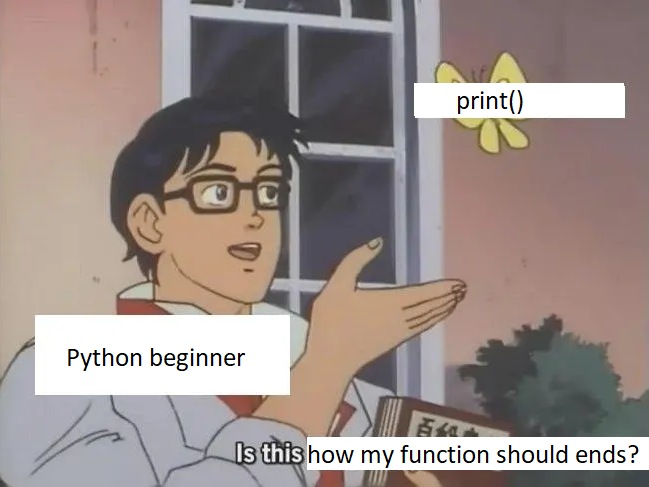

Но это не так. Сравните:

In [ ]:
def my_function_return(x):
    return x

def my_function_print(x):
    print("print inside function:", x)
    
print("my_function_return:", str(my_function_return(67)))
print("my_function_print:", str(my_function_print(67)))

my_function_return: 67
print inside function: 67
my_function_print: None


Поэтому, когда вы пишете функции:

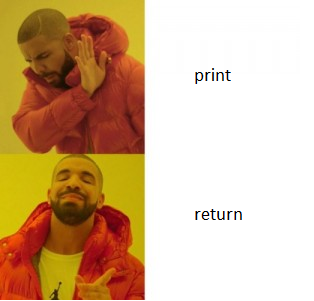

# Аргументы

Как и в математике, все таки чаще функции принимают на вход какие-то аргументы, с которыми или в зависимости от которых потом выполняются какие-то действия. Давайте разберемся как они устроены.

* **Фиксированные**

В инструкции нашей функции мы укажем, что функция принимает на вход ровно один аргумент, поэтому если подавать функции большее или меньшее число аргументов, то возникнет ошибка.

In [ ]:
def hi(name):
    print('Hello,', name)

In [ ]:
hi('Mark')

Hello, Mark


In [ ]:
# что будет, если аргументов будет больше, чем нужно ф-ции?

hi('Sonya', 'Mitya')

TypeError: hi() takes 1 positional argument but 2 were given

* **Дефолтные**


Помните, как некоторые аргументы функции `print()` имеют дефолтные значения? Точно так же можно прописывать для собственной функции некоторые значения параметров по умолчанию.

In [ ]:
def hi(name='человек', phrase='как дела?'):
    print('привет,', name)
    print(phrase)
hi()

привет, человек
как дела?


In [ ]:
hi('Кто-то')

привет, Кто-то
как дела?


In [ ]:
hi('Еще кто-то', 'за окном весна!')

привет, Еще кто-то
за окном весна!


* **Именованные**

Когда мы вызываем функцию с некоторыми значениями, эти значения присваиваются аргументам в соответствии с их положением. Например, при вызове функции `hi('Кто-то')`, питон считает что значение `'Кто-то'` относится к первому аргументы, т.е. `name` = `'Кто-то'`. А в случае `hi('Кто-то', 'за окном весна!')` второе значение относится ко второму аргументу, т.е. к `phrase`. Но мы можем и по-другому вызвать нашу функцию:

In [ ]:
hi(name='Phoebe', phrase="What's up?")
hi(phrase="What's up?", name='Phoebe')
hi('Phoebe', phrase="What's up?")

привет, Phoebe
What's up?
привет, Phoebe
What's up?
привет, Phoebe
What's up?


In [ ]:
hi(name='Phoebe', "What's up?") # но НЕ МОЖЕМ вот так! 
                                # оно и понятно, уже неочевидно 
                                # какой по счету аргумент имеется в виду (особенно если их больше двух)

SyntaxError: positional argument follows keyword argument (<ipython-input-36-14cb1bd184bb>, line 1)

Такое миксование позиционных и именованных аргументов при вызове функции удобно, когда у функции много аргументов, какая-то часть из них имеет дефолтные значения, но хочется какой-то один поменять.

* **Произвольные**

Хочется снова упомянуть функцию `print()`. Заметьте, как мы в нее можем положить сколько угодно значений через запятую, и она их все выводит. Точно так же мы можем указать в инструкции функции, что она принимает какое угодно число значений.

В таком случае необходимо воспользоваться оператором `"звездочка"` (собирает набор значений в переменную типа кортеж).

In [ ]:
def print_sum(*values):
    print(values)
    print(type(values))
    print(sum(values))

print_sum(1, 2, 3, 4, 5)

(1, 2, 3, 4, 5)
<class 'tuple'>
15


Несколько примеров:

In [ ]:
def f(a, b, *vals):
    print(a, b, vals)

# f(1) # работать не будет
f(1, 2)
f(1, 2, 3)
f(1, 2, 3, 4)


1 2 ()
1 2 (3,)
1 2 (3, 4)


In [ ]:
def f(a, *vals, c):
    print(a, vals, c)

# f(1, 2) # работать не будет
f(1, 2, c=1) # c стало обязательно именованным при вызове

1 (2,) 1


# Переменные
С переменными тоже все не так просто. Есть разница, между переменной, которую вы создали вне функции и внутри функции. И не всегда можно так просто изменить переменную "извне" внутри функции.

#### Глобальные
Если переменная (как обычно) задана **вне** функций, то она называется _**глобальной**_. Ею можно воспользоваться в любом месте программы – как внутри функций, так и вне.

In [ ]:
x = 'global'

def f():
    print('x inside:', x)

f()
print('x outside:', x)


x inside: global
x outside: global


Причем неважно, задана ли переменная до или после создания функции. Главное чтобы она была задана до вызова функции, т.к. питон при вызове функции начинает искать переменную `pi` в глобальном пространстве.



In [ ]:
def circle(r):
    return 2 * pi * r

pi = 3.14159265359
print(pi)
print(circle(1))

3.14159265359
6.28318530718


#### Локальные

Переменные, которые живут **только внутри функции** называются _**локальными**_. Это и переменные, которые возникли из аргументов функции, и те, которые созданы внутри функции. Доступа к таким переменным вне функции нет.

In [ ]:
def f(arg):
    y = 'local ' * arg
    print(y)

f(2)

y # будет ошибка, т.к. такая переменная неизвестна
arg # как и эта тоже


local local 


NameError: name 'y' is not defined

# Взаимодействие глобальных и локальных


1. Использование одного и того же имени переменной для глобальной и локальной – никакой проблемы. Локальная живет внутри, глобальная остается какой была (т.е. не меняется).

In [ ]:
x = 'global'
def f():
    x = 'local'
    print('x inside:', x)
    
print('x outside:', x)
f()
print('x outside after call:', x)

x outside: global
x inside: local
x outside after call: global


2. Изменение глобальной переменной внутри функции – как видим в примере выше, глобальная переменная не изменилась. Чтобы переписать её значение, необходимо воспользоваться командой `global`.

In [ ]:
x = 'global'
def f():
    global x
    x = 'local'
    print('x inside:', x)
    
print('x outside:', x)
f()
print('x outside after call:', x)


x outside: global
x inside: local
x outside after call: local


Эту же команду необходимо использовать, если мы хотим выполнить следующий код:

In [ ]:
x = 'global'
def f():
#     global x
    x = x * 2
    print('x inside:', x)
    
print('x outside:', x)
f()
print('x outside after call:', x)

x outside: global


UnboundLocalError: local variable 'x' referenced before assignment

Заметьте как в примере, где мы использовали одинаковые имена переменных, ошибки не возникало. В том случае, Питон просто создал локально переменную x и она спокойно жила внутри функции. Здесь же Питон ругается, что ему неизвестна переменная x, и это логично, ведь внутри функции мы ее не задавали. При этом мы хотим ее поменять. При этом мы не сказали что она глобальная. Такая же _по смыслу_ ошибка возникла и вне темы функций:

In [ ]:
q = q * 2

NameError: name 'q' is not defined

3. Если мы создадим функцию внутри функции, то она будет жить только внутри большей функции. При этом переменная, которая создалась локально (т.е. внутри большей функции) не будет видна внутренней функции и необходимо (так же как с глобальными переменными) указать откуда переменная.


В дальнейшем примере необходимо раскомментировать строки в порядке, соответствующим увеличению количества решёток (#), и проанализировать, что происходит для каждого варианта и почему (можно сделать это в Replit).

In [ ]:
# # # x = 'global'
def g():
# # # #    global x
# # #    print('1)', x)
    x = 'local'
    print('2)', x)
    def h():
# #         nonlocal x
#         print('3)', x)
        x = 'innerlocal'
        print('4)', x)
    h()
    print('5)', x)

g()
# # # # # #h()
# # # print('6)', x)

2) local
4) innerlocal
5) local


# Лямбда-функции

Снова, снова, снова. Питонисты любят краткость (иногда излишнюю). Поэтому функции, если это необходимо, можно задавать **в одну строку**. Есть некоторые внутренние различия между созданием функции с помощью `def` и `lambda`, но мы не станем в это вдаваться подробно. В целом рекомендация такая – **не увлекайтесь** `lambda`, **не используйте её без особой надобности**. Как правило, лямбда-выражение используют как аргумент функции типа `map` (её первый аргумент это функция, которую применяют к каждому элементу последовательности).

Синтаксис лямбда-выражения такой:
````
lambda arg1, arg2, ..., argn : code(args)
````

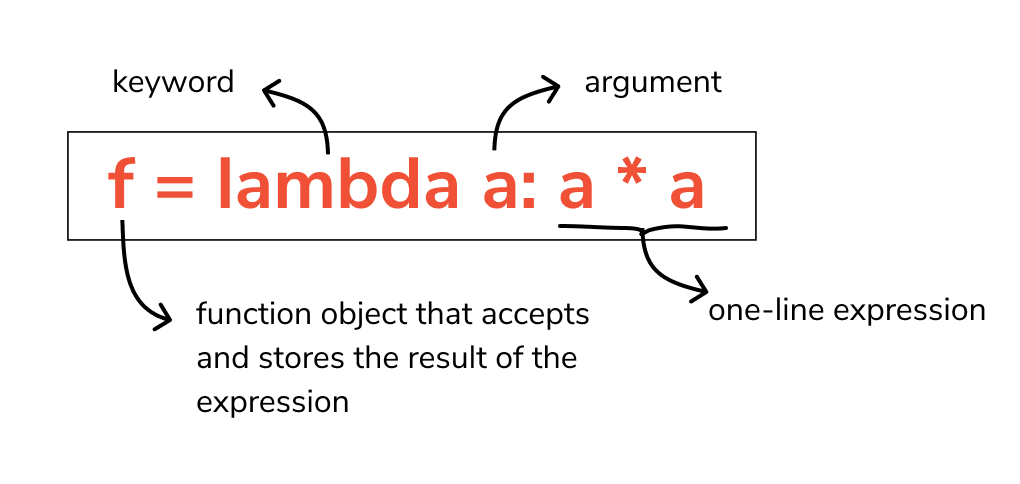

Такое выражение уже можно использовать как функцию, например:

In [ ]:
print((lambda x: x**2)(3))

9


Но часто выражению дают имя функции:

In [ ]:
sqr = lambda x: x**2
print(sqr(3))

9


**! Замечание**: обычно, строка кода лямбды содержит какие-то простые выражения (поэтому это строка, а не блок). Поэтому если хочется, но не получается, вместить в лямбду какой-то код – значит использования лямбды **излишне** и необходимо прибегнуть к стандартному созданию функции с помощью `def`.

Как и в обычных функциях, лямбда поддерживает позиционные/именованные/дефолтные/произвольные аргументы:

In [ ]:
print((lambda x, y, z: x + y + z)(1, 2, 3),\
(lambda x, y, z=3: x + y + z)(1, 2),\
(lambda x, y, z=3: x + y + z)(1, y=2),\
(lambda *args: sum(args))(1,2,3), sep='\n')

6
6
6
6


# Использование функций


Здесь подразумевается функции как и созданные с помощью `def`, так и с помощью `lambda`. Далее посмотрим "приемлемые" случаи использования лямбда-выражения, но помните, что вместо лямбды всегда можно поставить любую другую функцию.

Мы уже знакомы с функцией `map`, например, в качестве аргумента мы подавали функцию `int`, чтобы перевести символы входных данных в числа. Но задачи бывают разные, поэтому созданные собственные функции могут очень помочь в применении `map`.

In [ ]:
points = [(1, 2), (2, 5), (3, 10)]
f = lambda x: x[0]**2 - 2 * x[0] * x[1] + x[1]**2
print(list(map(f, points)))


[1, 9, 49]


Мы также знакомы с функцией `sorted()`, которая возвращает список отсортированных по возрастанию значений последовательности. Но у этой функции есть именованный аргумент `key`, который принимает функция, с помощью которой необходимо сравнивать элементы последовательности, чтобы отсортировать их от меньшего к большему. Например:



In [ ]:
spisok = [1, 12, -10, 5, 3, -1]
poryadok = lambda x: -x

# poryadok(spisok) : -1 -12 10 -5 -3 1 => -12 -5 -3 -1 1 10 => 12 5 3 1 -1 -10
print(sorted(spisok, key=poryadok))

[12, 5, 3, 1, -1, -10]


In [ ]:
points = zip([1, 2, 3, 4], [-1, -10, 2, -9])
poryadok = lambda x: x[0] # x[1] # x[0] + x[1] # x[0] * x[1]
print(sorted(points, key=poryadok))

[(1, -1), (2, -10), (3, 2), (4, -9)]


Точно так же устроены функции `min` и `max`:

In [ ]:
a = [1, 2, 3, -1, -2]
s = lambda x: -x
min(a, key=s), max(a, key=s)

(3, -2)

И познакомимся с одной новой функцией `filter()`, которая принимает на вход функцию и последовательность. Функция выдает последовательность типа `filter` с элементами входящей последовательности, значения которых выдали `True` на выходе функции-аргумента (помните, что `True` значение не обязательно булевое, это может быть любое ненулевое число, любой непустой объект и т.д.). Например:

In [ ]:
a = (-1, 2, -3, 4, 5, -10)
print(list(filter(lambda x: x > 0, a)))

[2, 4, 5]


In [ ]:
a = (0, 2, 0, 0, 1, -1, 0, 1, 10, 0, 0, -1)
print(list(filter(lambda x: x, a)))

[2, 1, -1, 1, 10, -1]


In [ ]:
s = '1 2     4 5 '.split(' ')
print(s)
print(list(filter(lambda x: x, s)))

['1', '2', '', '', '', '', '4', '5', '']
['1', '2', '4', '5']


# Еще немного умных слов: рекурсия

_Что такое рекурсия?_ Это процесс определения чего-нибудь в терминах самого себя. Например, рекурсивные последовательности задаются первыми несколькими элементами и формулой элемента `n` в терминах элементов `n-1`,..., `n-k`.

С помощью функций в питоне можно задавать и решать **рекурсивные алгоритмы**. Чтобы создать рекурсивную функцию (причем, желательно не бесконечную), необходимо:

Чтобы функция возвращала (`return`) саму себя (с новым аргументом), т.е. задана формула рекурсии.

Чтобы в зависимости от аргумента, возвращалась уже не наша функция, а какое-то значение, т.е. задан конец рекурсии.

Разберемся на примере факториала.

<center> $ n! = n \cdot (n-1)! = \ldots = n \cdot (n-1) \cdot \ldots \cdot 2 \cdot 1 $ <center>


In [ ]:
def factorial(n):
    if n == 1: # конец рекурсии
        return 1
    else:
        return n * factorial(n - 1) # формула рекурсии

factorial(5)

**! Обратите внимание** на то, как ведет себя рекурсия при вызове и выполнении кода после:

In [ ]:
def example(i):
    if i != 0:
        print(i, 'before')
        print('recursed', example(i - 1))
        print(i, 'after')
        return i
    else:
        print('the end!')
        return 0  

In [ ]:
_ = example(3)

3 before
2 before
1 before
the end!
recursed 0
1 after
recursed 1
2 after
recursed 2
3 after


`3 before` – выполнили print и вызвали example(2) - спустились в рекурсию

`2 before` – выполнили print и вызвали example(1) - спустились в рекурсию

`1 before` – выполнили print и вызвали example(0) - спустились в рекурсию

`the end!` – выполнили print, дошли до "конца" рекурсии и выдали значение, тем самым поднявшись по рекурсии на уровень выше

`recursed 0` – выполнили print

`1 after` – выполнили print и выдали значение, поднялись на уровень вверх

`recursed 1` – выполнили print

`2 after` – выполнили print и выдали значение, поднялись на уровень вверх

`recursed 2` – выполнили print

`3 after` – выполнили print и выдали значение, поднялись на уровень вверх 

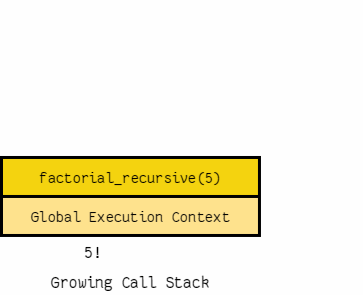

# Время приключений! (заданий)

![](https://media.giphy.com/media/fm4WhPMzu9hRK/giphy.gif)

In [ ]:
# инструмент для проверки правильности программы

def test_problem(func, test_data):
    for inputs, true_answer in test_data:
        answer = func(inputs)
        assert answer == true_answer, f'Expected {true_answer}, got {answer}. Input: {inputs}'
    print("OK!")

**Задача 1. Fizz Buzz** 

Напишите программу, которая выводит строковое представление чисел от 1 до n.

Но для чисел кратных трем он должен выводить «Fizz» вместо числа, а для кратных пяти - «Buzz». Для чисел, кратных трем и пяти, выведите «FizzBuzz».

In [ ]:
def fizz_buzz(n):
# ваш супер код
    return answer

In [ ]:
FIZZ_BUZZ_TESTS_DATA = [
    (1, ["1"]),
    (2, ["1", "2"]),
    (15, ["1", "2", "Fizz", "4", "Buzz", "Fizz", "7", "8", "Fizz", "Buzz", "11", "Fizz", "13", "14", "FizzBuzz"]),
]
test_problem(fizz_buzz, FIZZ_BUZZ_TESTS_DATA)

AssertionError: Expected ['1'], got []. Input: 1

**Задача 2. Fibonacci**

Напишите программу, которая выводить числа Фибоначчи. (Подсказка: последовательность Фибоначчи - это последовательность чисел, в которой каждое следующее число в последовательности - это сумма двух предыдущих чисел. Последовательность выглядит так: 1, 1, 2, 3, 5, 8, 13, …)

In [ ]:
def fibonacci(n):
# ваш код
    return answer

In [ ]:
FIBONACCI_TESTS_DATA = [
    (1, 1),
    (2, 1),
    (3, 2),
    (4, 3),
    (5, 5),
    (10, 55),
    (40, 102334155),
]
test_problem(fibonacci, FIBONACCI_TESTS_DATA)

NameError: name 'test_problem' is not defined

**Задача 3. Палиндром**

Определите, является ли строка палиндромом. Палиндром – это число или текст, одинаково читающееся в обоих направлениях.

In [ ]:
def is_palindrome(string):
# ваш код
    return answer

In [ ]:
IS_PALINDROME_TESTS_DATA = [
    ("", True),
    ("a", True),
    ("ab", False),
    ("aba", True),
    ("malayalam", True),
]
test_problem(is_palindrome, IS_PALINDROME_TESTS_DATA)

**Задача 4. Найти все дубли в списке**

В массиве целых чисел некоторые элементы появляются дважды, а другие – один раз.

Найдите все элементы, которые встречаются дважды в этом массиве.

Выводить элементы нужно в том же порядке, в котором они первый раз встретились в листе.


In [ ]:
def find_duplicates(arr):
# ваш код
    return answer

In [ ]:
FIND_DUPLICATES_TESTS_DATA = [
    ([1], []),
    ([1, 1], [1]),
    ([1, 1, 2, 2], [1, 2]),
]
test_problem(find_duplicates, FIND_DUPLICATES_TESTS_DATA)

# Функциональное программирование

Функциональное программирование — это одна из парадигм программирования. Вычисления в ней понимаются не как последовательность изменения состояний, но как вычисление значений функций в их математическом понимании. То есть функции в ФП — это не подпрограммы, а отображения элементов одного множества на другое по определенным правилам.

_ФП основывается на взаимодействии с функциями. Функции, функции everywhere!_


> Функциональная программа — это совокупность определений функций.

Функции содержат вызовы других функций, а также инструкции, которые управляют последовательностью этих вызовов.

Вычисления начинаются с вызова некоторой функции. Она, в свою очередь, тоже вызывает функции, которые входят в её определение в соответствии с внутренней иерархией (часто вызовы происходят рекурсивно).

Каждый вызов возвращает значение, но помещается оно не в переменную, а в саму функцию, которая этот вызов совершила. После этого функция продолжает работу. Такой процесс продолжается до того момента, как та самая функция, с которой начались вычисления, не вернёт пользователю конечный результат.


> Функциональное программирование — программирование, в котором **нет побочных эффектов**.

Отсутствие побочного эффекта означает, что функция полагается только на данные внутри себя, и не меняет данные, находящиеся вне функции. Вычисленный результат — есть единственный эффект выполнения любой функции.

**Еще ф-ции высших порядков** 

принимают другие функции в качестве аргумента или же возврают функцию как результат:

* `zip()`

* `map()`

* `filter()` фильтрует последовательность по заданному условию

* `apply()` применяет входящую функцию к позиционным и именованным аргументам


\+ [functools](https://docs.python.org/3/library/functools.html) — это библиотека, которая содержит дополнительные функции высших порядков

In [ ]:
# использование apply()

def print_things(q, w, e, r, t=None, y=1):
    print(q, w, e, r, t, y)
    
print_things(*[0, 2, 4, 6], **{'t': 8, 'y': 10})

0 2 4 6 8 10


# Резюме за сегодня:



* Функция в питоне есть объект, принимающий аргументы и возвращающий значение. Определяется с помощью инструкции _def_.

* Функция может принимать произвольное количество аргументов или не принимать их вовсе. Виды аргументов: позиционные, именованные, обязательными и необязательными.

* Есть анонимные функции могут содержать лишь одно выражение, но и выполняются они быстрее. Анонимные функции создаются с помощью инструкции _lambda_. В них необязательно имя перемееной.

* Рекурсивные функции являются мощным механизмом в программировании. Часто использование рекурсии приводит к ошибкам – бесконечная рекурсия, когда цепочка вызовов функций никогда не завершается и продолжается, пока не кончится свободная память в компьютере.